# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [ ]:
Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

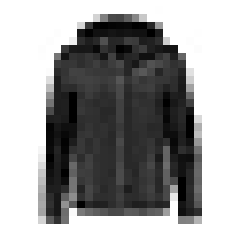

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [11]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

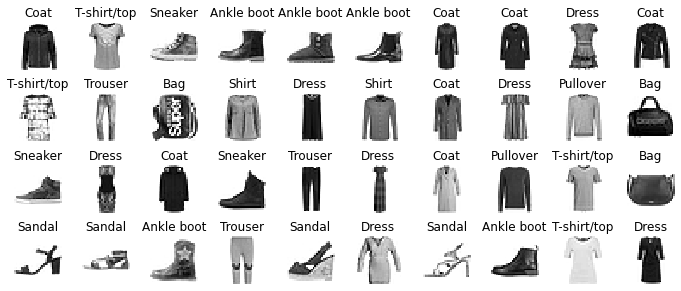

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer(hidden1.name) is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[-0.04399463, -0.06997027, -0.00352595, ...,  0.0510326 ,
         0.05340552, -0.02488869],
       [-0.03453835,  0.03172976, -0.05466762, ...,  0.06068759,
         0.06156945, -0.03507417],
       [ 0.03808899,  0.06982467, -0.064899  , ...,  0.0329145 ,
        -0.01388647, -0.06805878],
       ...,
       [ 0.05640757, -0.00840311,  0.07426412, ..., -0.0166516 ,
        -0.06865365, -0.04912937],
       [ 0.01575904,  0.04564549,  0.06362043, ...,  0.06882524,
        -0.06922435, -0.06659683],
       [-0.02976887, -0.02076601, -0.06405593, ...,  0.0087015 ,
        -0.01771215, -0.04245488]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [29]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7188 - accuracy: 0.7659 - val_loss: 0.4972 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4874 - accuracy: 0.8298 - val_loss: 0.4402 - val_accuracy: 0.8446
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4451 - accuracy: 0.8445 - val_loss: 0.4102 - val_accuracy: 0.8600
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4178 - accuracy: 0.8531 - val_loss: 0.4145 - val_accuracy: 0.8566
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3971 - accuracy: 0.8604 - val_loss: 0.4032 - val_accuracy: 0.8604
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3802 - accuracy: 0.8660 - val_loss: 0.4045 - val_accuracy: 0.8538
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3674 - accuracy: 0.8691 - val_loss: 0.3650 - val_accuracy:

In [30]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [31]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

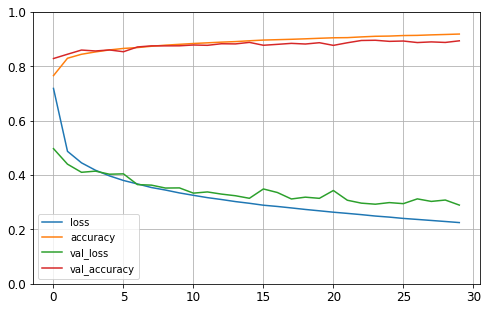

In [33]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.8844


[0.3234080672264099, 0.8844000101089478]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

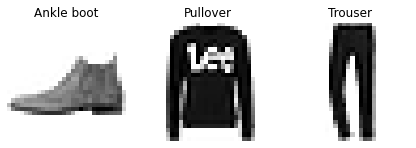

In [42]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) repeat with more layers
#### 2) Plot Learning curves when using different optimizers
#### 3) Plot Learning curves when using different batch size
#### 4) Plot Learning curves when using different number of epochs
#### 5) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 6) Use Batch Normalisation

### Plot Learning curves with  with more layers

In [43]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7823 - accuracy: 0.7325 - val_loss: 0.5123 - val_accuracy: 0.8198
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4749 - accuracy: 0.8308 - val_loss: 0.4252 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4191 - accuracy: 0.8514 - val_loss: 0.4146 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3854 - accuracy: 0.8610 - val_loss: 0.3582 - val_accuracy: 0.8740
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3605 - accuracy: 0.8681 - val_loss: 0.3628 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3420 - accuracy: 0.8754 - val_loss: 0.3353 - val_accuracy: 0.8806
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3263 - accuracy: 0.8795 - val_loss: 0.3278 - val_accuracy

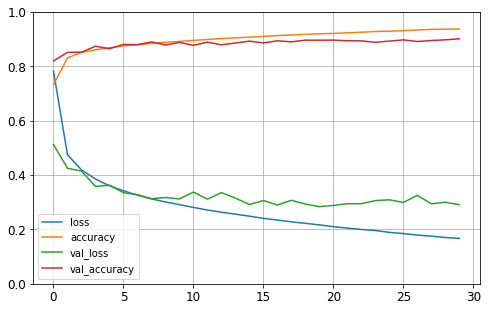

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

###  With different optimizer

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3859 - accuracy: 0.8579 - val_loss: 0.3740 - val_accuracy: 0.8598
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3390 - accuracy: 0.8757 - val_loss: 0.3548 - val_accuracy: 0.8724
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3192 - accuracy: 0.8817 - val_loss: 0.3422 - val_accuracy: 0.8766
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3032 - accuracy: 0.8887 - val_loss: 0.3711 - val_accuracy: 0.8692
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2890 - accuracy: 0.8924 - val_loss: 0.3472 - val_accuracy: 0.8814
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2783 - accuracy: 0.8970 - val_loss: 0.3122 - val_accuracy: 0.8882
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2620 - accuracy: 0.9019 - val_loss: 0.3280 - val_ac

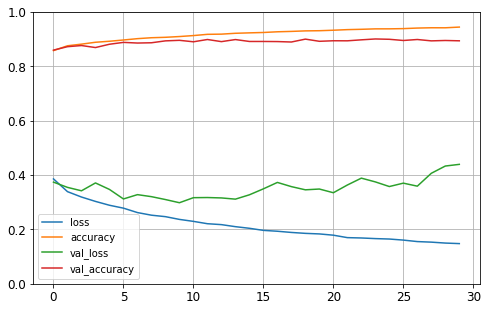

In [49]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### With different different batch size & number of epochs

In [51]:
history = model.fit(X_train, y_train, batch_size=48, epochs=10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1146/1146 [==============================] - 8s 7ms/step - loss: 0.1232 - accuracy: 0.9522 - val_loss: 0.4718 - val_accuracy: 0.8940
Epoch 2/10
1146/1146 [==============================] - 8s 7ms/step - loss: 0.1226 - accuracy: 0.9533 - val_loss: 0.4958 - val_accuracy: 0.8956
Epoch 3/10
1146/1146 [==============================] - 9s 8ms/step - loss: 0.1170 - accuracy: 0.9555 - val_loss: 0.4563 - val_accuracy: 0.8954
Epoch 4/10
1146/1146 [==============================] - 9s 7ms/step - loss: 0.1168 - accuracy: 0.9565 - val_loss: 0.4649 - val_accuracy: 0.8984
Epoch 5/10
1146/1146 [==============================] - 8s 7ms/step - loss: 0.1187 - accuracy: 0.9555 - val_loss: 0.4547 - val_accuracy: 0.8954
Epoch 6/10
1146/1146 [==============================] - 8s 7ms/step - loss: 0.1145 - accuracy: 0.9572 - val_loss: 0.4632 - val_accuracy: 0.9014
Epoch 7/10
1146/1146 [==============================] - 8s 7ms/step - loss: 0.1109 - accuracy: 0.9582 - val_loss: 0.4873 - val_accuracy:

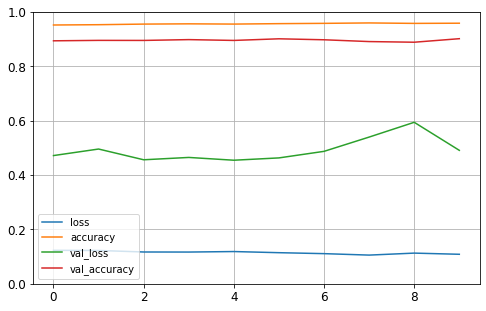

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### With Dropout and batch_normalization

In [53]:
from keras.layers import BatchNormalization
from keras.layers import Dropout

#### Example N 1

In [54]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [56]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5520 - accuracy: 0.8031 - val_loss: 0.3943 - val_accuracy: 0.8584
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4320 - accuracy: 0.8438 - val_loss: 0.3605 - val_accuracy: 0.8672
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3954 - accuracy: 0.8566 - val_loss: 0.3384 - val_accuracy: 0.8790
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3746 - accuracy: 0.8619 - val_loss: 0.3268 - val_accuracy: 0.8786
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3558 - accuracy: 0.8691 - val_loss: 0.3276 - val_accuracy: 0.8792
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3401 - accuracy: 0.8750 - val_loss: 0.3090 - val_accuracy: 0.8866
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3288 - accuracy: 0.8786 - val_loss: 0.3259 - val_accuracy:

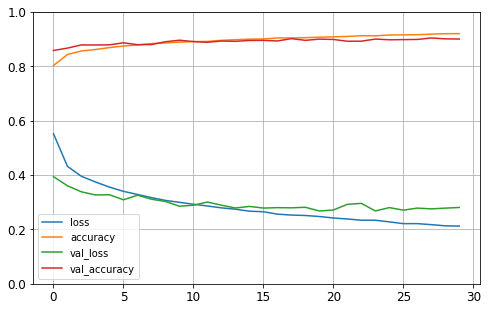

In [57]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### Example N 2

In [58]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [59]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [60]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 1.1232 - accuracy: 0.5713 - val_loss: 0.5754 - val_accuracy: 0.7932
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7009 - accuracy: 0.7480 - val_loss: 0.4816 - val_accuracy: 0.8274
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6176 - accuracy: 0.7822 - val_loss: 0.4723 - val_accuracy: 0.8242
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5709 - accuracy: 0.8037 - val_loss: 0.4250 - val_accuracy: 0.8486
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5405 - accuracy: 0.8155 - val_loss: 0.3997 - val_accuracy: 0.8560
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5253 - accuracy: 0.8215 - val_loss: 0.3957 - val_accuracy: 0.8524
Epoch 7/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5017 - accuracy: 0.8321 - val_loss: 0.3889 - val_ac

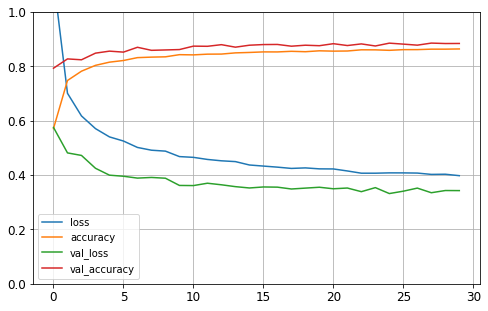

In [61]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()